In [2]:
import os
import base64
from requests import post, get
import json

In [5]:
from pickle import NONE
# Fetch songs from the list based on list's id
CLIENT_ID = '1166f0b84b934167852ffd8a80488f34'
CLIENT_SECRET = '6466af4f83bd4dd29346ddcbf8ec4630'

def get_token():
  auth_string = CLIENT_ID + ":" + CLIENT_SECRET
  auth_bytes = auth_string.encode("utf-8")
  auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

  url = "https://accounts.spotify.com/api/token"
  headers = {
      "Authorization": "Basic " + auth_base64,
      "Content-Type": "application/x-www-form-urlencoded"
  }
  data = {"grant_type": "client_credentials"}
  result = post(url, headers=headers, data=data)
  json_result = json.loads(result.content)
  token = json_result["access_token"]
  print(json_result)
  return token

def get_auth_header(token):
  return {"Authorization": "Bearer " + token}


# get id and name of each song in the playlist
def search_for_playlist(like_ids, token, list_id):
  query = f"https://api.spotify.com/v1/playlists/{list_id}/tracks?fields=items(track(id%2Cname))"
  headers = get_auth_header(token)
  result = get(query, headers=headers)
  json_result = json.loads(result.content)["tracks"]["items"]
  for track in json_result:
    new_track = {"track": {"id": track["track"]["id"], "name": track["track"]["name"]}}
    like_ids["items"].append(new_track)

token = get_token()

# change the new playlist id here
like_list_id = "37i9dQZF1DX4OzrY981I1W?si=4432a61086f64b58"
like_ids = {"items": []}
search_for_playlist(like_ids, token, like_list_id)
print(like_ids)
# save the result to different file
with open("like.py", "w") as outfile:
  json.dump(like_ids, outfile)

# change the new playlist id here
dislike_list_id = "37i9dQZF1DXa2PvUpywmrr?si=e546a99bb1044bff"
dislike_ids = {"items": []}
search_for_playlist(dislike_ids, token, dislike_list_id)
print(dislike_ids)
# save the result to different file
with open("dislike.py", "w") as outfile:
  json.dump(dislike_ids, outfile)



{'access_token': 'BQAHzyDvonL0dJ8jwrJ8yWTeWSzGJvSXNLeuLM-YUjzuKDKA8Xsh7783ojIby0DVstlhI3i61qbbgov2NA65H_rDZhq7P6hdCofvWRJvnQ8YtydPtb96', 'token_type': 'Bearer', 'expires_in': 3600}
{'items': [{'track': {'id': '2L9N0zZnd37dwF0clgxMGI', 'name': 'ceilings'}}, {'track': {'id': '086myS9r57YsLbJpU0TgK9', 'name': "Why'd You Only Call Me When You're High?"}}, {'track': {'id': '4RvWPyQ5RL0ao9LPZeSouE', 'name': 'Everybody Wants To Rule The World'}}, {'track': {'id': '3EaJDYHA0KnX88JvDhL9oa', 'name': 'Dark Red'}}, {'track': {'id': '5r5cp9IpziiIsR6b93vcnQ', 'name': 'Walking On A Dream'}}, {'track': {'id': '4RVwu0g32PAqgUiJoXsdF8', 'name': 'Happier Than Ever'}}, {'track': {'id': '1170VohRSx6GwE6QDCHPPH', 'name': 'Kilby Girl'}}, {'track': {'id': '003vvx7Niy0yvhvHt4a68B', 'name': 'Mr. Brightside'}}, {'track': {'id': '2bdVgAQgosGUJoViVDNeOV', 'name': 'LIMBO'}}, {'track': {'id': '7D0RhFcb3CrfPuTJ0obrod', 'name': 'Sparks'}}, {'track': {'id': '2Xb6wJYGi0QXwURw5WWvI5', 'name': 'Right Down the Line'}}, {'t

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/MaybeYouLike'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/MaybeYouLike


In [ ]:
# make a string of ids separated with commas 
# this string will be used to get the feature of songs in the playlist
import json


with open("like.py", "r") as infile:
    yes_ids = json.load(infile)

with open("dislike.py", "r") as infile:
    no_ids = json.load(infile)

songs = yes_ids["items"]
like_songs_ids = ""
for track in songs:
    like_songs_ids += track["track"]["id"] + ","
like_songs_ids = like_songs_ids[:-1]
with open("like.txt","w") as f:
    f.write(like_songs_ids)

songs = no_ids["items"]
dislike_songs_ids = ""
for track in songs:
    dislike_songs_ids += track["track"]["id"] + ","
dislike_songs_ids = dislike_songs_ids[:-1]
with open("dislike.txt","w") as f:
    f.write(dislike_songs_ids)

## Fetch data to get feature

In [ ]:
def get_feature(song_ids, token):
  query = f"https://api.spotify.com/v1/audio-features?ids={song_ids}"
  headers = get_auth_header(token)
  result = get(query, headers=headers)
  json_result = json.loads(result.content)
  print(json_result)
  return json_result

# store data into two different files "like.json" and "dislike.json"
with open("like.json", "w") as f:
  json.dump(get_feature(like_songs_ids, token), f)

with open("dislike.json", "w") as f:
  json.dump(get_feature(dislike_songs_ids, token), f)



{'audio_features': [{'danceability': 0.516, 'energy': 0.322, 'key': 9, 'loudness': -11.762, 'mode': 1, 'speechiness': 0.0292, 'acousticness': 0.473, 'instrumentalness': 0.00194, 'liveness': 0.215, 'valence': 0.261, 'tempo': 148.005, 'type': 'audio_features', 'id': '2L9N0zZnd37dwF0clgxMGI', 'uri': 'spotify:track:2L9N0zZnd37dwF0clgxMGI', 'track_href': 'https://api.spotify.com/v1/tracks/2L9N0zZnd37dwF0clgxMGI', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2L9N0zZnd37dwF0clgxMGI', 'duration_ms': 182888, 'time_signature': 3}, {'danceability': 0.691, 'energy': 0.631, 'key': 2, 'loudness': -6.478, 'mode': 1, 'speechiness': 0.0368, 'acousticness': 0.0483, 'instrumentalness': 1.13e-05, 'liveness': 0.104, 'valence': 0.8, 'tempo': 92.004, 'type': 'audio_features', 'id': '086myS9r57YsLbJpU0TgK9', 'uri': 'spotify:track:086myS9r57YsLbJpU0TgK9', 'track_href': 'https://api.spotify.com/v1/tracks/086myS9r57YsLbJpU0TgK9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/086myS9r57

# Clean data

In [ ]:
import json
import pandas as pd 
import numpy as np


# create frame
with open("like.json","r") as f:
    liked = json.load(f)
liked = pd.DataFrame(liked["audio_features"])

with open("dislike.json","r") as f:
    disliked = json.load(f)
disliked = pd.DataFrame(disliked["audio_features"])

# add like column
liked["liked"] = [1] * 100
disliked["liked"] = [0] * 90


Integrate data

In [ ]:
# combine two playlists
data = pd.concat([liked,disliked])
# drop unecessary features
data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
# shuffle
data = data.sample(frac=1)

# save to csv file
try :
    data = pd.read_csv("data.csv")
    data2 = pd.read_csv("data2.csv")
    print("Loading file...")
except :
    data.to_csv("data.csv",index=False)
    print("Saving file...")



Loading file...


# Explore Data

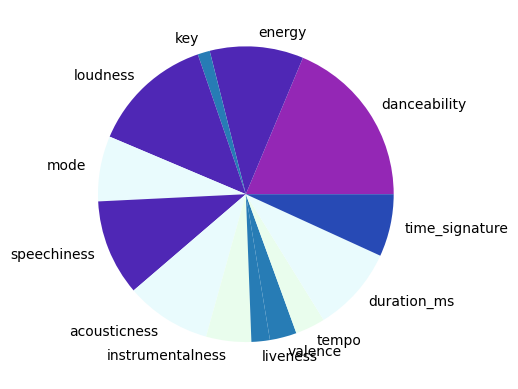

In [ ]:
# import the library we're going to use
import matplotlib.pyplot as plt

# get correlation between each attribute and label
corr = data.corr()[["liked"]]
corr2 = data2.corr()[["liked"]]


#remove label
cArr = corr.values.flatten()[:-1]
cArr2 = corr2.values.flatten()[:-1]

# take absolute value so all numbers are positive for pie chart
absArr = abs(cArr)
absArr2 = abs(cArr2)

colorArr = []

for x in cArr:
    if (x > 0.5):
      colorArr.append('#FDE9F8')
    elif (x > 0.4):
      colorArr.append('#F4E9FD')
    elif (x > 0.3):
      colorArr.append('#E9EBFD')
    elif (x > 0.2):
      colorArr.append('#E9FBFD')
    elif (x > 0.1):
      colorArr.append('#E9FDED')
    elif (x > 0):
      colorArr.append('#F7FDE9')
    elif (x > -0.1):
      colorArr.append('#277CB5')
    elif (x > -0.25):
      colorArr.append('#274AB5')
    elif (x > -0.5):
      colorArr.append('#4F27B5')
    else:
      colorArr.append('#9427B5')


plt.pie(absArr, labels = data.select_dtypes(['number']).columns[:-1],
          colors = colorArr)
plt.show()

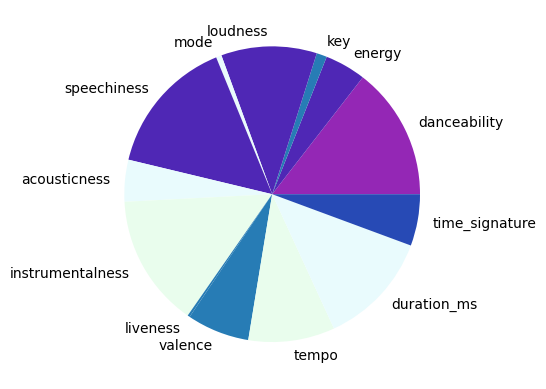

In [ ]:
for x in cArr2:
    if (x > 0.5):
      colorArr2.append('#FDE9F8')
    elif (x > 0.4):
      colorArr2.append('#F4E9FD')
    elif (x > 0.3):
      colorArr2.append('#E9EBFD')
    elif (x > 0.2):
      colorArr2.append('#E9FBFD')
    elif (x > 0.1):
      colorArr2.append('#E9FDED')
    elif (x > 0):
      colorArr2.append('#F7FDE9')
    elif (x > -0.1):
      colorArr2.append('#277CB5')
    elif (x > -0.25):
      colorArr2.append('#274AB5')
    elif (x > -0.5):
      colorArr2.append('#4F27B5')
    else:
      colorArr2.append('#9427B5')

plt.pie(absArr2, labels = data.select_dtypes(['number']).columns[:-1],
          colors = colorArr2)
plt.show()

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score , log_loss , roc_auc_score 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
def evaluation(y_true,y_pred):
    return accuracy_score(y_true , y_pred), roc_auc_score(y_true , y_pred) , log_loss(y_true , y_pred ) 

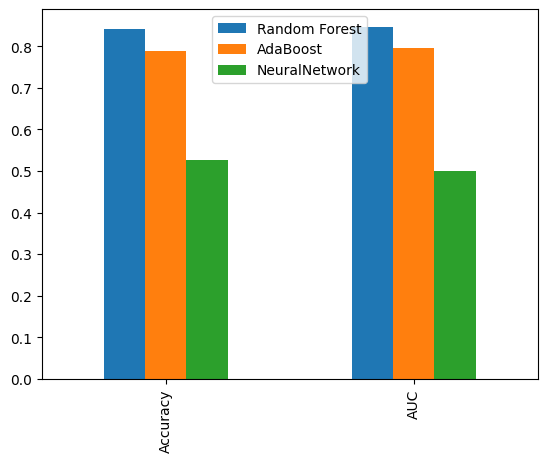

In [ ]:
# model for dataset1
X , y = data.drop("liked",axis=1) , data.liked
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

np.random.seed(42)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_adaboost_pred = adaboost.predict(X_test)

neural = MLPClassifier()
neural.fit(X_train,y_train)
y_neural_pred = neural.predict(X_test)

class_rf , auc_rf, loss_rf   = evaluation(y_test ,y_rf_pred)
class_adaboost , auc_adaboost, loss_adaboost = evaluation(y_test ,y_adaboost_pred)
class_neural , auc_neural , loss_neural = evaluation(y_test , y_neural_pred)

scores = {
    "Random Forest":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "AdaBoost": {
        "Accuracy":class_adaboost,
        "Loss":loss_adaboost,
        "AUC":auc_adaboost
    },
    "NeuralNetwork":{
        "Accuracy":class_neural,
        "Loss":loss_neural,
        "AUC":auc_neural
    }
}
scores = pd.DataFrame(scores)
scores.drop("Loss").plot.bar();

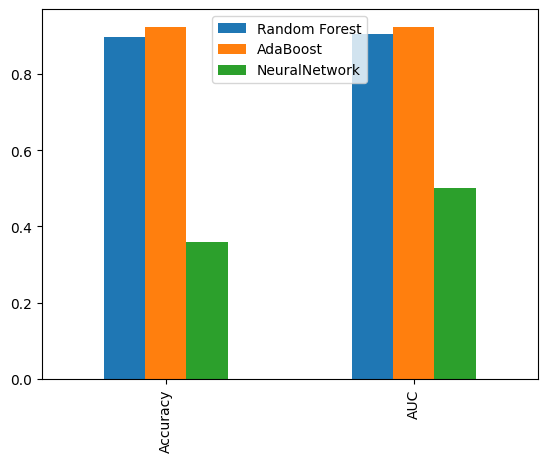

In [ ]:
# model for dataset2
X , y = data2.drop("liked",axis=1) , data2.liked
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X,y,test_size=0.2,random_state=0)

np.random.seed(42)

rf2 = RandomForestClassifier()
rf2.fit(X_train2,y_train2)
y_rf2_pred = rf2.predict(X_test2)

adaboost2 = AdaBoostClassifier()
adaboost2.fit(X_train2, y_train2)
y_adaboost2_pred = adaboost2.predict(X_test2)

neural2 = MLPClassifier()
neural2.fit(X_train2,y_train2)
y_neural2_pred = neural2.predict(X_test2)

class_rf2, auc_rf2, loss_rf2  = evaluation(y_test2 ,y_rf2_pred)
class_adaboost2 , auc_adaboost2, loss_adaboost2= evaluation(y_test2 ,y_adaboost2_pred)
class_neural2 , auc_neural2, loss_neural2 = evaluation(y_test2 , y_neural2_pred)

scores2 = {
    "Random Forest":{
        "Accuracy":class_rf2,
        "Loss":loss_rf2,
        "AUC":auc_rf2
    },
    "AdaBoost": {
        "Accuracy":class_adaboost2,
        "Loss":loss_adaboost2,
        "AUC":auc_adaboost2
    },
    "NeuralNetwork":{
        "Accuracy":class_neural2,
        "Loss":loss_neural2,
        "AUC":auc_neural2
    }
}
scores2 = pd.DataFrame(scores2)
scores2.drop("Loss").plot.bar();

# Find hyperparameter


In [ ]:
# dataset1 with the evaluation above, we choose RandomForest for our model and now let's find the hyperparameter that works best for our data
np.random.seed(42)

rf = RandomForestClassifier(n_jobs=-1)
rf_grid = {
 'max_depth': list(range(15,20)),
 'min_samples_leaf': [1,2],
 'min_samples_split': [3,4,5],
 'n_estimators': list(range(40,45))
}
rf_cv = GridSearchCV(rf,rf_grid,verbose=2,cv=3, refit=True)
rf_cv.fit(X_train , y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   1.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.2s
[CV] END max_depth=15, min_samples_le

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [40, 41, 42, 43, 44]},
             verbose=2)

In [ ]:
# best hyperparameter for dataset 1
rf_cv.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 40}

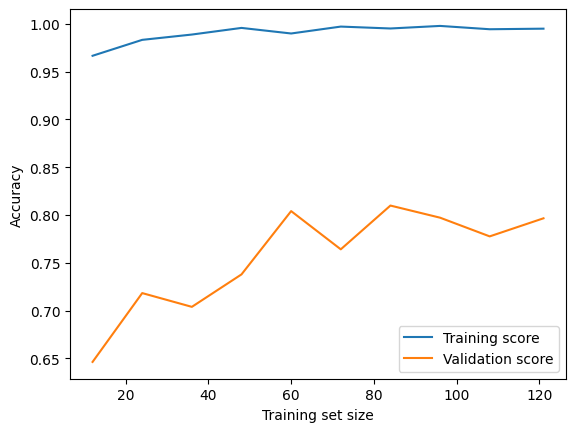

In [ ]:
# learning curve of dataset 1
# indicate the more songs we havve, the better accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

train_model = RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=40)

train_sizes, train_scores, val_scores = learning_curve(train_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



{'Old': {'Accuracy': 0.8421052631578947, 'Loss': 5.691103166702708, 'AUC': 0.8472222222222222}, 'Last': {'Accuracy': 0.868421052631579, 'Loss': 4.7425859722522565, 'AUC': 0.8722222222222222}}


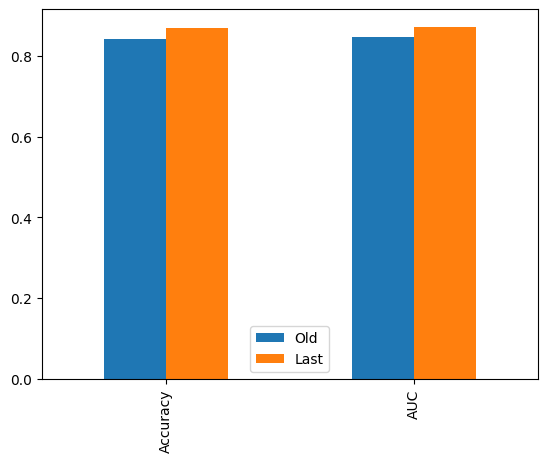

In [ ]:
# dataset 1 barcharts
rf_pred = rf_cv.predict(X_test)
last_acc , last_loss , last_auc = evaluation(y_test,rf_pred)

train_model = RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=40)
train_model.fit(X_train, y_train)
rf_pred = train_model.predict(X_test)
last_acc , last_auc, last_loss = evaluation(y_test,rf_pred)


comp = {
    "Old":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "Last":{
        "Accuracy":last_acc,
        "Loss":last_loss,
        "AUC":last_auc
    }
}
print(comp)
comp = pd.DataFrame(comp)
comp.drop("Loss").plot.bar();

In [ ]:
# dataset2 with the evaluation above, we choose AdaBoost for our model and now let's find the hyperparameter that works best for our data
np.random.seed(42)

adaboost2 = AdaBoostClassifier()
adaboost2_grid = {
 'learning_rate': [0.1, 0.01, 0.001],
 'n_estimators': list(range(10,60))
}
adaboost2_cv = GridSearchCV(adaboost2,adaboost2_grid,verbose=1,cv=2)
adaboost2_cv.fit(X_train2 , y_train2)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39, ...]},
             verbose=1)

In [ ]:
adaboost2_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 26}

In [ ]:
results = adaboost2_cv.cv_results_
for i in range(len(results['params'])):
    print("Accuracy for Case {}: {:.4f} (std: {:.4f})".format(
        i+1, results['mean_test_score'][i], results['std_test_score'][i]))
    print("Hyperparameters:", results['params'][i])

Accuracy for Case 1: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
Accuracy for Case 2: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 11}
Accuracy for Case 3: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 12}
Accuracy for Case 4: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 13}
Accuracy for Case 5: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 14}
Accuracy for Case 6: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 15}
Accuracy for Case 7: 0.8013 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 16}
Accuracy for Case 8: 0.8397 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 17}
Accuracy for Case 9: 0.8397 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 18}
Accuracy for Case 10: 0.8397 (std: 0.0192)
Hyperparameters: {'learning_rate': 0.1,

{'Old': {'Accuracy': 0.9230769230769231, 'Loss': 2.772588722239781, 'AUC': 0.9242857142857143}, 'Last': {'Accuracy': 0.9230769230769231, 'Loss': 2.772588722239781, 'AUC': 0.9242857142857143}}


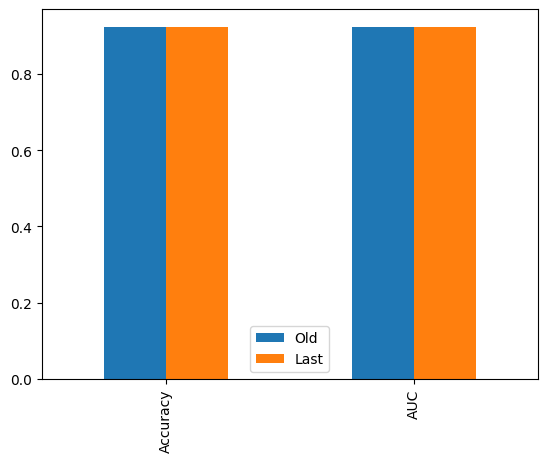

In [ ]:
# bar chart for dataset 2
train_model_2 = RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=40)
train_model_2.fit(X_train2, y_train2)
train_predict_2 = train_model_2.predict(X_test2)
last_acc2 ,last_auc2, last_loss2 = evaluation(y_test2, train_predict_2)


comp2 = {
    "Old":{
        "Accuracy":class_adaboost2,
        "Loss":loss_adaboost2,
        "AUC":auc_adaboost2
    },
    "Last":{
        "Accuracy":last_acc2,
        "Loss":last_loss2,
        "AUC":last_auc2
    }
}
print(comp2)
comp2 = pd.DataFrame(comp2)
comp2.drop("Loss").plot.bar();

In [ ]:
# retrain dataset 2 with Random Forest algorithm
np.random.seed(42)

rf2 = RandomForestClassifier(n_jobs=-1)
rf_grid = {
 'max_depth': list(range(15,20)),
 'min_samples_leaf': [1,2],
 'min_samples_split': [3,4,5],
 'n_estimators': list(range(40,45))
}
rf2_cv = GridSearchCV(rf,rf_grid,verbose=2,cv=3, refit=True)
rf2_cv.fit(X_train2 , y_train2)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   2.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.1s
[CV] END max_depth=15, min_samples_le

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [40, 41, 42, 43, 44]},
             verbose=2)

{'Old': {'Accuracy': 0.8974358974358975, 'Loss': 3.6967849629863747, 'AUC': 0.9042857142857144}, 'Last': {'Accuracy': 0.9487179487179487, 'Loss': 1.8483924814931874, 'AUC': 0.9442857142857143}}


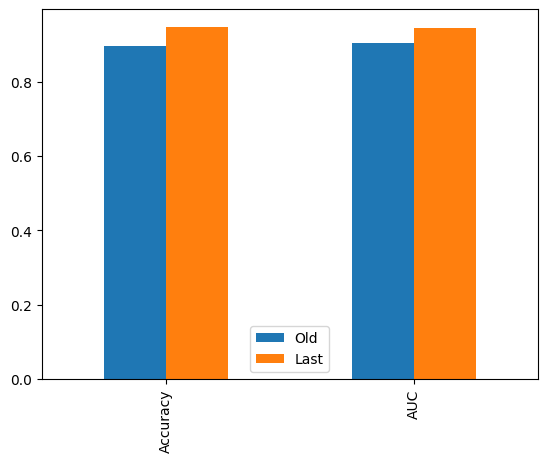

In [ ]:
# dataset 2 barcharts with Random Forest 
train_model2 = RandomForestClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=42)
train_model2.fit(X_train2, y_train2)
rf_pred2 = train_model2.predict(X_test2)
last_acc2 ,last_auc2 , last_loss2= evaluation(y_test2,rf_pred2)


comp = {
    "Old":{
        "Accuracy":class_rf2,
        "Loss":loss_rf2,
        "AUC":auc_rf2
    },
    "Last":{
        "Accuracy":last_acc2,
        "Loss":last_loss2,
        "AUC":last_auc2
    }
}
print(comp)
comp = pd.DataFrame(comp)
comp.drop("Loss").plot.bar();

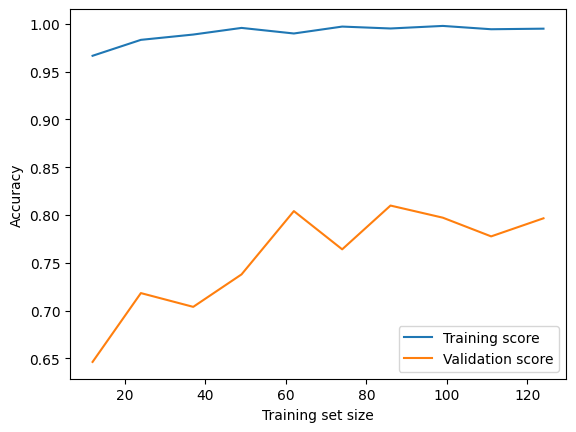

In [ ]:
# learning curve of dataset 2
# indicate the more songs we havve, the better accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

train_sizes_2, train_scores_2, val_scores_2 = learning_curve(train_model_2, X_train2, y_train2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean_2 = np.mean(train_scores, axis=1)
val_mean_2 = np.mean(val_scores, axis=1)
# Plot the learning curves
plt.plot(train_sizes_2, train_mean_2, label='Training score')
plt.plot(train_sizes_2, val_mean_2, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [6]:
# dataset 1
# Reimporting libraries in case I just want to run this cell
import pandas as pd
import pickle
import urllib.parse
from sklearn.ensemble import RandomForestClassifier

# extract information with song data in json file fetched via spotify api
def song_info(song_data):
    data = json.loads(song_data)["tracks"]["items"][0]
    song_id = data["id"]
    artist = data["artists"][0]["name"]
    title = data["name"]
    return song_id, artist, title

# load data to build model
data = pd.read_csv("data.csv")
X_data = data.drop("liked",axis=1)
y_data =  data.liked

model = RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=40)

model.fit(X_data, y_data)

token = get_token()
song= input("\n\n\nGive us a song (and also the artist to specify): ")

song = urllib.parse.quote(song)
query = f"https://api.spotify.com/v1/search?q={song}&type=track"
headers = get_auth_header(token)
result = get(query, headers=headers)
result = result.content

try :
    
    song_id, artist, title = song_info(result)
    query = f"https://api.spotify.com/v1/audio-features/{song_id}"
    headers = get_auth_header(token)
    result = get(query, headers=headers)
    data = json.loads(result.content)
    data = pd.DataFrame(data,index=[0])
    data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
    print(f"\n\nThere is {list(model.predict_proba(data)[0])[1]*100:.4f}% chance that you like \"{title}\" by {artist}\n\n")
except IndexError:
    print("\n\nSong is not found\n\n")


{'access_token': 'BQBVDi0J7SJ1Tdtxs27cPY5MLrV-3eNSPgK47wf02air-pdi8-6_NxwgddBz76_Q6BfTQdLZqhU86zN0MK-pfT9Gs4knYxTEO7B8qVUbDBfUKrflHUDg', 'token_type': 'Bearer', 'expires_in': 3600}



Give us a song (and also the artist to specify): someone you love


There is 87.2917% chance that you like "Someone You Loved" by Lewis Capaldi




In [7]:
# dataset 2
# Reimporting libraries in case I just want to run this cell
import pandas as pd
import pickle
import urllib.parse

# extract information with song data in json file fetched via spotify api
def song_info(song_data):
    data = json.loads(song_data)["tracks"]["items"][0]
    song_id = data["id"]
    artist = data["artists"][0]["name"]
    title = data["name"]
    return song_id, artist, title

# load data to build model
data2 = pd.read_csv("data2.csv")
X_data2 = data2.drop("liked",axis=1)
y_data2 =  data2.liked

model2 = RandomForestClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=42)
model2.fit(X_data2, y_data2)

token = get_token()
song= input("\n\n\nGive us a song (and also the artist to specify): ")

song = urllib.parse.quote(song)
query = f"https://api.spotify.com/v1/search?q={song}&type=track"
headers = get_auth_header(token)
result = get(query, headers=headers)
result = result.content

try :
    
    song_id, artist, title = song_info(result)
    query = f"https://api.spotify.com/v1/audio-features/{song_id}"
    headers = get_auth_header(token)
    result = get(query, headers=headers)
    data = json.loads(result.content)
    data = pd.DataFrame(data,index=[0])
    data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
    print(f"\n\nThere is {list(model2.predict_proba(data)[0])[1]*100:.4f}% chance that you like \"{title}\" by {artist}\n\n")
except IndexError:
    print("\n\nSong is not found\n\n")


{'access_token': 'BQBUxfqkxZlSJXo_nP_NX946zuxeaIGwqd9FlHuZ0rJixl5JDlZ0h0dS-TSrK9F88A55lPSNyelx_3-byPzd0z1kMK-tql2D7xNwy-3uH2-tNdY395z3', 'token_type': 'Bearer', 'expires_in': 3600}



Give us a song (and also the artist to specify): someone you love


There is 50.7937% chance that you like "Someone You Loved" by Lewis Capaldi


